In [35]:
import numpy as np
import math
import scipy.linalg as la
import matplotlib.pyplot as plt

In [36]:
def RK34step(f, told, Yold, h):
    Y1 = f(told, Yold)
    Y2 = f(told + h/2, Yold + h/2*Y1)
    Y3 = f(told + h/2, Yold + h/2*Y2)
    Z3 = f(told + h, Yold - h*Y1 + 2*h*Y2)
    Y4 = f(told + h, Yold + h*Y3)
    Ynew = Yold + h/6*(Y1 + 2*Y2 + 2*Y3 + Y4)

    err = np.abs(h/6*(2*Y2+Z3-2*Y3-Y4))
    return Ynew, err

def newstep (tol, err, errold, hold, k):
    hnew = hold * np.power(tol/max(err), 2/(3*k))*np.power(tol/max(errold), -1/(3*k))
    return hnew
    
def adaptiveRK34(f, t0, tf, y0, tol):
    k = 4
    h = (tf-t0)*np.power(tol,1/4)/(1000*(1+la.norm(f(t0,y0))))
    t = [t0]
    Y = [y0]
    ERR = [np.zeros_like(y0)]
    y, err = RK34step(f, t[-1], y0, h)
    Y.append(y)
    ERR.append(err)
    h = newstep(tol, ERR[-1], np.array([tol, tol]), h, k)
    t.append(t[-1] + h)

    while t[-1] + h < tf:
        y, err = RK34step(f, t[-1], Y[-1], h)
        Y.append(y)
        ERR.append(err)
        h = newstep(tol, ERR[-1], ERR[-2], h, k)
        t.append(t[-1] + h)

    y, err = RK34step(f, t[-1], Y[-1], tf-t[-1])
    t.append(tf)
    Y.append(y)
    ERR.append(err)
    return t, Y, ERR


In [37]:
def VanDerPol(t,u):
    return np.array([u[1], mu*(1-u[0]**2)*u[1]-u[0]])

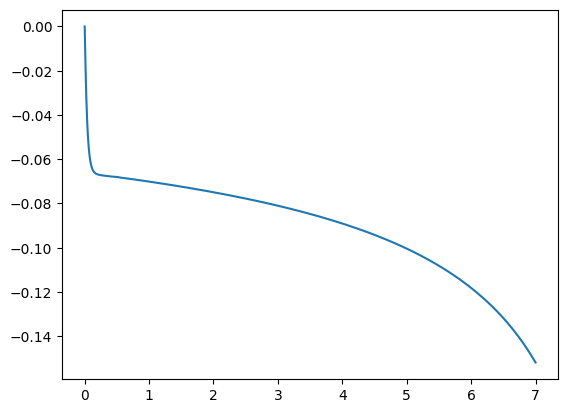

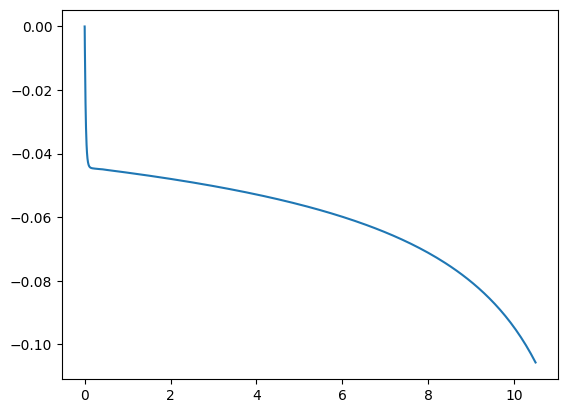

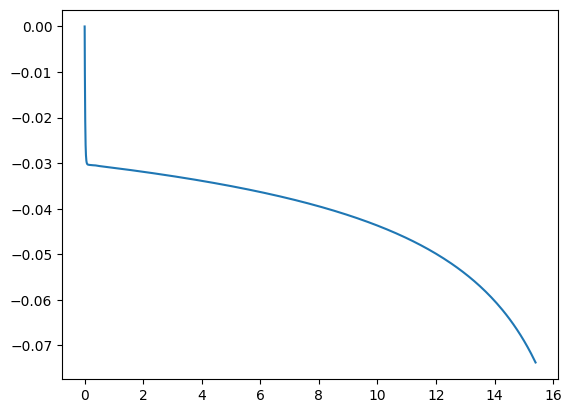

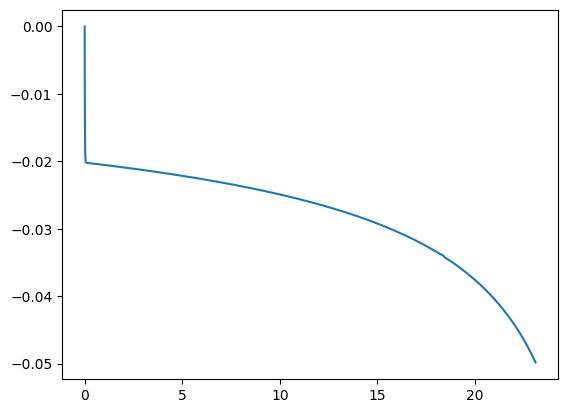

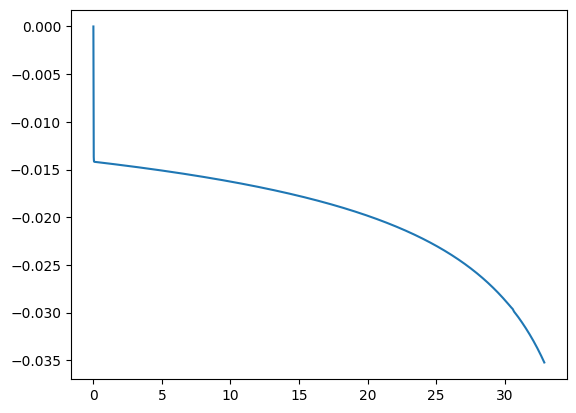

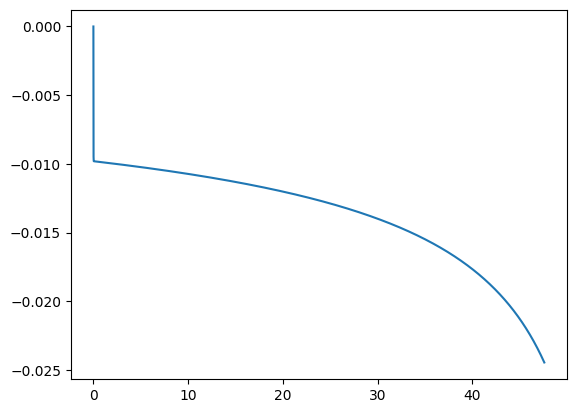

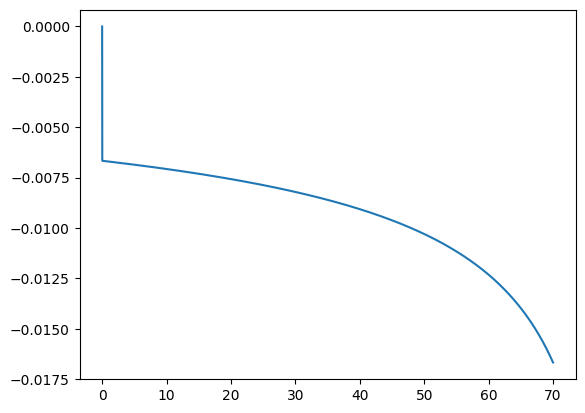

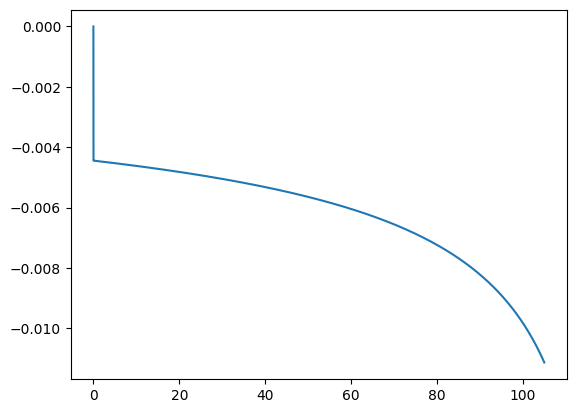

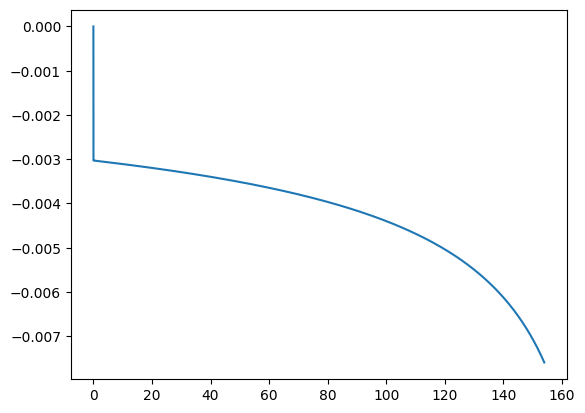

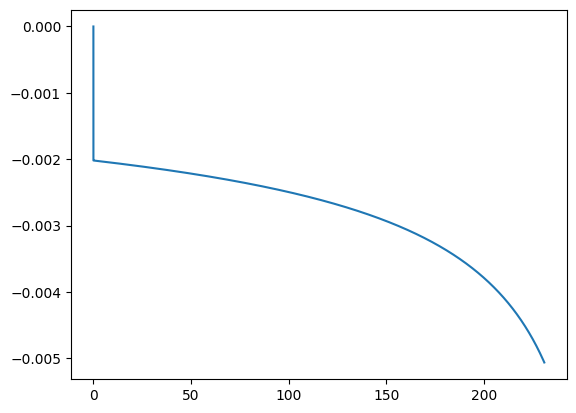

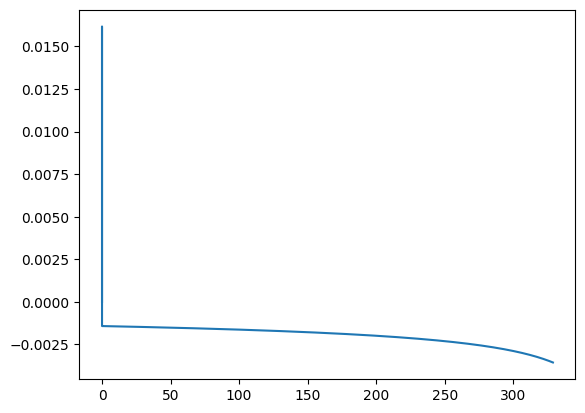

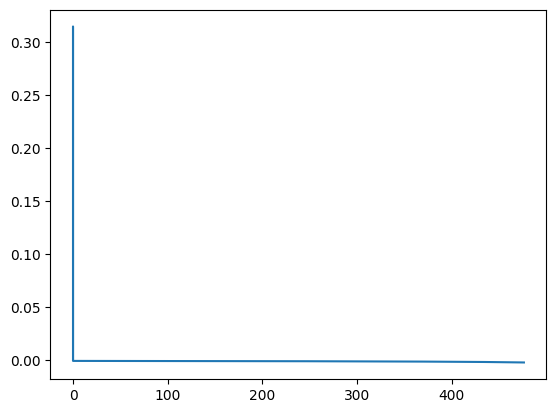

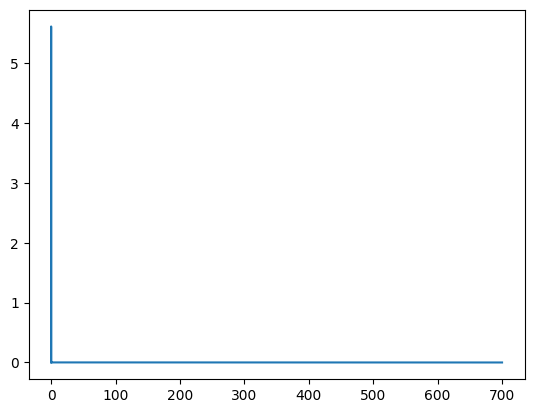

In [38]:
mus = [10, 15, 22, 33, 47, 68, 100, 150, 220, 330, 470, 680, 1000]
steps = []
for mu in mus:
    t, Y, ERR = adaptiveRK34(VanDerPol, 0, 0.7*mu, np.array([2,0]), 1e-6)
    steps.append(len(t))
    x = [Yx[0] for Yx in Y]
    y = [Yy[1] for Yy in Y]
    plt.plot(t, y)
    plt.show()
    #plt.plot(x,y)


[139, 195, 310, 579, 1123, 2321, 5002, 11231, 24141, 54302, 110146, 230560, 498616]


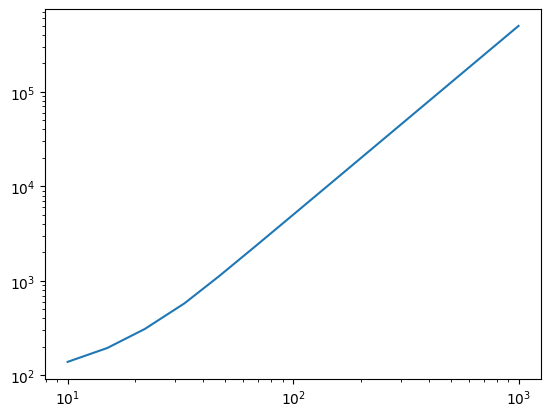

In [39]:
print(steps)
plt.loglog(mus, steps)

[41, 42, 47, 47, 48, 49, 54, 50, 49, 46, 48, 50, 55]


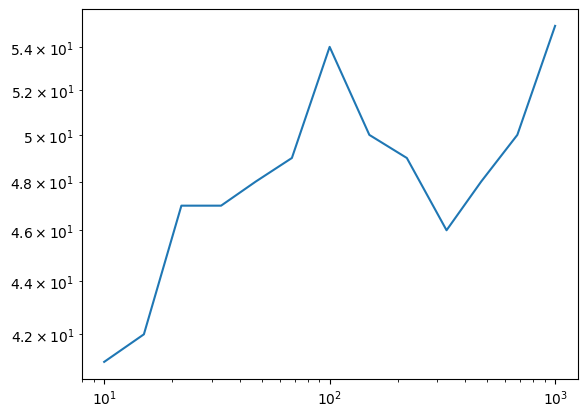

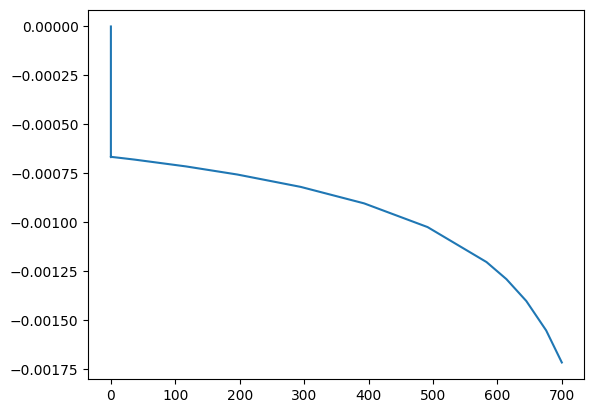

In [47]:
from scipy.integrate import solve_ivp
steps = []

for mu in mus:
    solution = solve_ivp(VanDerPol, [0, 0.7*mu], np.array([2,0]), tol=1e-6, method='BDF')
    steps.append(len(solution.t))
print(steps)
plt.loglog(mus, steps)
plt.show()
x = [Yx[0] for Yx in Y]
y = [Yy[1] for Yy in Y]
plt.plot(solution.t, solution.y[1])
plt.show()
